Es cierto que ya contamos con un modelo de clasificacion de animales. Sin embargo, he pensado en extender el proyecto, 
e implementar nuevos modelos que aprendan a clasificar imagenes de diferentes razas para un mismo animal. 

En este notebook, me encargare de analizar, visualizar y preparar el conjunto de datos para un modelo de clasificacion de razas de perro. Tambien llevare a cabo el mismo procedimiento con otras especies, como son las mariposas, o algunas aves.


# 1. Explicacion del objetivo

Lo que quiero lograr con el entrenamiento de nuevos modelos, es poder escalar la pagina Web a un sitio Web con diferentes paginas. De esta manera, se integraran varios modelos de clasificacion entrenados, y el usuario podra navegar por las diferentes paginas, a fin de obtener la salida correspondiente del modelo para una imagen dada.

Para el caso del modelo clasificador de perros, voy a utilizar un dataset llamado "Stanford Dogs Dataset", el cual se puede encontrar accediendo a la siguiente URL ==> http://vision.stanford.edu/aditya86/ImageNetDogs/

Segun la pagina oficial, el dataset cuenta con un total de 20580 imagenes, que muestran imagenes de 120 razas de perro diferentes.

# 2. Importo las librerias y los archivos necesarios

In [1]:
import matplotlib.pyplot as plt
import cv2
import os

import shutil  # Libreria que me permitira copiar archivos a diferentes directorios.
import numpy as np
from tqdm import tqdm

import tarfile  # Libreria para descomprimir el archivo .tar descargado (dataset)

# 3. Analisis del dataset descargado en Kaggle

In [2]:
# Lo primero que hago es descomprimir el contenido que he descargado de la web. En este caso, el dataset de imagenes esta
# contenido en un archivo con extension .tar .

# Tratare de extraer el contenido de este archivo en un nuevo directorio

nuevo_directorio = 'contenido_carpetaPerros/'

if not os.path.exists(nuevo_directorio):
    os.mkdir(nuevo_directorio)
    print('El directorio {} se ha creado correctamente.'.format(nuevo_directorio))
else:
    print('El directorio {} ya existe.'.format(nuevo_directorio))

El directorio contenido_carpetaPerros/ ya existe.


In [3]:
# A continuacion, extraigo el contenido del archivo .tar en el directorio creado.
# Para empezar, compruebo que estoy en el directorio correcto.

print('Ruta actual ==> ', os.getcwd())

Ruta actual ==>  C:\Users\David\Documents\--TOKIOSCHOOL--\---ESPECIALIDAD INTELIGENCIA ARTIFICIAL---\PROYECTO FINAL\Proyecto Final Especialidad IA TOKIO\cuadernos_entrenamiento_modelos\desarrollo_modeloPerros


In [4]:
# Importante ejecutar dos veces!!
os.chdir('..')
os.chdir('..')

In [5]:
ruta_archivo_tar = 'dataset_perros.tar'
rutaBASE = 'cuadernos_entrenamiento_modelos/desarrollo_modeloPerros/contenido_carpetaPerros/'

os.chdir(rutaBASE)  # Me dirijo al directorio asignado en 'rutaBASE'.

if len(os.listdir()) > 0:  # Si la carpeta ya tiene contenido, no descomprimo el archivo .tar (el contenido ya estaria dentro)
    print('El contenido del archivo {} ya se encuentra en el directorio de destino.'.format(ruta_archivo_tar))
else:
    with tarfile.open(ruta_archivo_tar, 'r') as archivo_tar:
        os.chdir(rutaBASE)
        archivo_tar.extractall()
        print('El contenido del archivo "dataset_perros.tar" ha sido descomprimido con exito.')

El contenido del archivo dataset_perros.tar ya se encuentra en el directorio de destino.


In [6]:
# Una vez tenemos el contenido del archivo comprimido, voy a revisar los tipos de razas de perro para los que tengo imagenes,
# y tratare de mostrar el numero de ejemplos que tengo para cada una de las razas

# Voy a dirigirme a la ruta que contiene las imagenes.
os.chdir('Images/')
print(os.getcwd())

C:\Users\David\Documents\--TOKIOSCHOOL--\---ESPECIALIDAD INTELIGENCIA ARTIFICIAL---\PROYECTO FINAL\Proyecto Final Especialidad IA TOKIO\cuadernos_entrenamiento_modelos\desarrollo_modeloPerros\contenido_carpetaPerros\Images


In [7]:
# A continuacion, muestro la cantidad de razas para las que tengo imagenes

print('Existen un total de {} razas para las que existen ejemplos en el dataset'.format(len(os.listdir())))

Existen un total de 120 razas para las que existen ejemplos en el dataset


In [8]:
for carpeta_perro in os.listdir():
    partes_nombreCarpeta = carpeta_perro.split('-')
    nombre_perro = partes_nombreCarpeta[-1]
    
    print('Tengo un total de {} ejemplos para la raza {}.'.format(len(os.listdir(os.path.join(os.getcwd(), carpeta_perro))),
                                                                  nombre_perro))

Tengo un total de 152 ejemplos para la raza Chihuahua.
Tengo un total de 185 ejemplos para la raza Japanese_spaniel.
Tengo un total de 252 ejemplos para la raza Maltese_dog.
Tengo un total de 149 ejemplos para la raza Pekinese.
Tengo un total de 214 ejemplos para la raza Tzu.
Tengo un total de 188 ejemplos para la raza Blenheim_spaniel.
Tengo un total de 196 ejemplos para la raza papillon.
Tengo un total de 172 ejemplos para la raza toy_terrier.
Tengo un total de 172 ejemplos para la raza Rhodesian_ridgeback.
Tengo un total de 239 ejemplos para la raza Afghan_hound.
Tengo un total de 175 ejemplos para la raza basset.
Tengo un total de 195 ejemplos para la raza beagle.
Tengo un total de 187 ejemplos para la raza bloodhound.
Tengo un total de 171 ejemplos para la raza bluetick.
Tengo un total de 159 ejemplos para la raza tan_coonhound.
Tengo un total de 153 ejemplos para la raza Walker_hound.
Tengo un total de 157 ejemplos para la raza English_foxhound.
Tengo un total de 148 ejemplos par

In [9]:
# Como se puede ver, cuento con distinta cantidad de ejemplos para cada una de las razas.
# No obstante, no voy a crear un modelo que aprenda a clasificar 120 razas de perro. Para este caso, limitare el
# modelo a unas 10 razas diferentes.

# Lista con los nombres de las razas que el modelo va a aprender a clasificar.
lista_razas_perros = ['Chihuahua',
                      'toy_terrier',
                      'beagle',
                      'American_Staffordshire_terrier',
                      'Yorkshire_terrier',
                      'Labrador_retriever',
                      'Border_collie',
                      'Rottweiler',
                      'Doberman',
                      'French_bulldog']
print(len(lista_razas_perros))

10


In [10]:
print(os.listdir())

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [11]:
# Me aseguro de crear el directorio de destino para alojar las imagenes de las razas seleccionadas.

os.chdir('../../')
print(os.getcwd())


directorio_destino = 'imagenesRazasModelo/'

if not os.path.exists(directorio_destino):
    os.mkdir(directorio_destino)
    print('Se ha creado el directorio "{}" correctamente.'.format(directorio_destino))
else:
    print('El directorio "{}" ya ha sido creado con anterioridad'.format(directorio_destino))


C:\Users\David\Documents\--TOKIOSCHOOL--\---ESPECIALIDAD INTELIGENCIA ARTIFICIAL---\PROYECTO FINAL\Proyecto Final Especialidad IA TOKIO\cuadernos_entrenamiento_modelos\desarrollo_modeloPerros
El directorio "imagenesRazasModelo/" ya ha sido creado con anterioridad


In [12]:
# La lista anterior contiene los nombres de las razas que el modelo aprendera a clasificar. 
# Lo siguiente sera copiar el contenido de estas carpetas a un nuevo directorio, que contenga unicamente imagenes de las
# razas seleccionadas.

os.chdir('imagenesRazasModelo/')

if len(os.listdir()) > 0:
    print('Las imagenes de las razas seleccionadas ya se encuentran en el directorio de destino.')

else:
    os.chdir('..')
    rutaDirectorioImagenes = 'contenido_carpetaPerros/Images/' 

    os.chdir(rutaDirectorioImagenes)  # Me dirijo al directorio que contiene las subcarpetas para cada raza.
    for nombre_raza in tqdm(lista_razas_perros):

        for carpeta_nombrePerro in os.listdir():
            partes_nombre_carpeta = carpeta_nombrePerro.split('-')
            nombre_perro = partes_nombre_carpeta[-1]

            if nombre_perro == nombre_raza:

                # Primero, me dirijo al directorio de destino, y creo una carpeta para la raza en cuestion
                os.chdir('..')
                os.chdir('..')
                os.chdir('imagenesRazasModelo/')

                #if not os.path.exists(nombre_raza + '/'):
                #    os.mkdir(nombre_raza + '/')
                #    print('La carpeta destino para los ejemplos de {} ha sido creada correctamente.'.format(nombre_raza))


                os.chdir('..')
                os.chdir(rutaDirectorioImagenes)
                directorio_origen = os.path.join(os.getcwd(), carpeta_nombrePerro)
                directorio_destino = os.path.join('../../imagenesRazasModelo/', nombre_raza)

                # Copia el contenido del directorio de origen al directorio de destino
                shutil.copytree(directorio_origen, directorio_destino)
                print('Los ejemplos para la raza {} han sido copiados con exito en "{}".'.format(nombre_raza,
                                                                                                 directorio_destino))
                break
            else:
                del partes_nombre_carpeta
                del nombre_perro
                continue
    

Las imagenes de las razas seleccionadas ya se encuentran en el directorio de destino.


In [15]:
os.getcwd()

'C:\\Users\\David\\Documents\\--TOKIOSCHOOL--\\---ESPECIALIDAD INTELIGENCIA ARTIFICIAL---\\PROYECTO FINAL\\Proyecto Final Especialidad IA TOKIO\\cuadernos_entrenamiento_modelos\\desarrollo_modeloPerros\\imagenesRazasModelo'

In [17]:
# Una vez copiados los nuevos directorios, reviso que todo este correctamente.

print("#"*50)
print('Existen {} razas diferentes para entrenar al modelo.'.format(len(os.listdir('../../imagenesRazasModelo/'))))
print()
print('Razas escogidas para el entrenamiento del modelo:')
for carpeta_raza in os.listdir('../../imagenesRazasModelo/'):
    if carpeta_raza in lista_razas_perros:
        print(carpeta_raza, '==> {} ejemplos.'.format(len(os.listdir(os.path.join('../../imagenesRazasModelo/', carpeta_raza)))))

print('#'*50)

##################################################
Existen 11 razas diferentes para entrenar al modelo.

Razas escogidas para el entrenamiento del modelo:
American_Staffordshire_terrier ==> 200 ejemplos.
beagle ==> 200 ejemplos.
Border_collie ==> 200 ejemplos.
Chihuahua ==> 200 ejemplos.
Doberman ==> 200 ejemplos.
French_bulldog ==> 200 ejemplos.
Labrador_retriever ==> 200 ejemplos.
Rottweiler ==> 200 ejemplos.
toy_terrier ==> 200 ejemplos.
Yorkshire_terrier ==> 200 ejemplos.
##################################################


# 4. Procesamiento del dataset a utilizar para entrenar el modelo

En este paso, me encargare de modificar la resolucion de las imagenes para asignarles una resolucion apropiada para la complejidad del modelo a entrenar, por lo que creare un nuevo directorio que contenga estas mismas imagenes, pero con una
resolucion normalizada.

No obstante, antes de aplicar el cambio de resolucion a las imagenes, voy a generar nuevas haciendo uso de la clase imageDataGenerator de Keras.
A fin de normalizar el contenido del dataset, y evitar algun tipo de subajuste en relacion a alguna de las etiquetas a clasificar, asignare un **limite de 200 imagenes para todas las etiquetas** (como todas tienen un numero menor que este limite, 
generare tantas imagenes como ejemplos faltan para alcanzar dicho limite.

In [18]:
print(os.listdir())

['.ipynb_checkpoints', 'American_Staffordshire_terrier', 'beagle', 'Border_collie', 'Chihuahua', 'Doberman', 'French_bulldog', 'Labrador_retriever', 'Rottweiler', 'toy_terrier', 'Yorkshire_terrier']


In [ ]:
# El directorio actual tiene una subcarpeta que me interesa eliminar (primer elemento).

In [19]:
LIMITE_SUPERIOR = 200

def asignarImagenesEspecie():
    
    """Funcion sin parametros que se crear un diccionario cuyos pares clave-valor tienen la siguiente estructura
       ==> especieAnimal: nImagenesFaltantes_limiteSuperior.
       
       Dicho diccionario es creado iterando sobre el contenido del directorio que contiene las imagenes, y finalmente
       es devuelto por la funcion al entorno global del cuaderno."""
    
    dictImagenesAnimales = {}
    
    for carpeta in os.listdir():
        
        if carpeta == '.ipynb_checkpoints':  # Como dog tiene el numero maximo de imagenes, no generamos imagenes para esta etiqueta.
            continue
        
        dictImagenesAnimales[carpeta] = len(os.listdir(os.path.join(os.getcwd(), carpeta)))
        
        
    return dictImagenesAnimales


dictImagenesAnimales = asignarImagenesEspecie()

In [20]:
# Muestro el contenido del hashmap

for clave, valor in dictImagenesAnimales.items():
    print(clave, '==>', valor)

American_Staffordshire_terrier ==> 200
beagle ==> 200
Border_collie ==> 200
Chihuahua ==> 200
Doberman ==> 200
French_bulldog ==> 200
Labrador_retriever ==> 200
Rottweiler ==> 200
toy_terrier ==> 200
Yorkshire_terrier ==> 200


In [22]:
# Para llevar a cabo la generacion de datos, hasgo la clase ImageDataGenerator de Keras.

from keras.preprocessing.image import ImageDataGenerator

In [26]:
print(os.listdir())

['.ipynb_checkpoints', 'American_Staffordshire_terrier', 'beagle', 'Border_collie', 'Chihuahua', 'Doberman', 'French_bulldog', 'Labrador_retriever', 'Rottweiler', 'toy_terrier', 'Yorkshire_terrier']


In [23]:
# Directorio de entrada y salida
# directorioImagenes = 'imagenesRazasModelo/'
output_directory = 'imagenesRazasModelo/'  

# Creo un generador de data augmentation
datagen = ImageDataGenerator(rotation_range= 30, horizontal_flip=True, fill_mode='nearest')


# Recorrer cada imagen en el dataset original y obtener su ruta
for carpeta in tqdm(os.listdir()):
    
    if carpeta in dictImagenesAnimales.keys():  # Este condicional evita iterar sobre '.ipynb_checkpoints'.
        
        if len(os.listdir(os.path.join(os.getcwd(), carpeta))) >= LIMITE_SUPERIOR:
            
            print('La etiqueta {} ya dispone de la cantidad de ejemplos deseada'.format(carpeta))
            continue
        
        else:
        
            imagenesNuevas = 0

            for image_file in os.listdir(os.path.join(os.getcwd(), carpeta)):

                if imagenesNuevas >= (LIMITE_SUPERIOR - dictImagenesAnimales[carpeta]):
                    break
                else:
                    try:

                        imagenesNuevas +=1 
                        
                        ruta_imagen = os.path.join(os.getcwd() + '/' + carpeta + '/', image_file)
                        image = cv2.imread(ruta_imagen)

                        # Verifica si la imagen se ha cargado correctamente
                        if image is not None:
                            # Agrega una dimensión al array de la imagen
                            image = np.expand_dims(image, axis=0)
                            # Genera imágenes aumentadas y guárdalas en el directorio de salida
                            i = 0
                            for batch in datagen.flow(image, batch_size=1, save_to_dir=os.getcwd() + '/' + carpeta + '/', save_format='jpg'):
                                i += 1
                                if i == 1:
                                    break
                    except Exception as e:
                        print('Error al cargar la imagen: {} ==> {}'.format(image_file, e))

            print('Se han generado {} nuevas imagenes para la etiqueta {}'.format(imagenesNuevas, carpeta))

print('Data augmentation completada.')
print('Las imágenes generadas han sido alojadas en el directorio {}.'.format(output_directory))

100%|██████████| 11/11 [00:00<00:00, 1832.37it/s]

La etiqueta American_Staffordshire_terrier ya dispone de la cantidad de ejemplos deseada
La etiqueta beagle ya dispone de la cantidad de ejemplos deseada
La etiqueta Border_collie ya dispone de la cantidad de ejemplos deseada
La etiqueta Chihuahua ya dispone de la cantidad de ejemplos deseada
La etiqueta Doberman ya dispone de la cantidad de ejemplos deseada
La etiqueta French_bulldog ya dispone de la cantidad de ejemplos deseada
La etiqueta Labrador_retriever ya dispone de la cantidad de ejemplos deseada
La etiqueta Rottweiler ya dispone de la cantidad de ejemplos deseada
La etiqueta toy_terrier ya dispone de la cantidad de ejemplos deseada
La etiqueta Yorkshire_terrier ya dispone de la cantidad de ejemplos deseada
Data augmentation completada.
Las imágenes generadas han sido alojadas en el directorio imagenesRazasModelo/.


In [35]:
for carpeta in os.listdir():
    if carpeta == '.ipynb_checkpoints':
        continue
    else:
        print('Existen {} ejemplos para la etiqueta {}.'.format(len(os.listdir(os.path.join(os.getcwd(), carpeta))),
                                                                carpeta))

Existen 200 ejemplos para la etiqueta American_Staffordshire_terrier.
Existen 200 ejemplos para la etiqueta beagle.
Existen 200 ejemplos para la etiqueta Border_collie.
Existen 200 ejemplos para la etiqueta Chihuahua.
Existen 200 ejemplos para la etiqueta Doberman.
Existen 200 ejemplos para la etiqueta French_bulldog.
Existen 200 ejemplos para la etiqueta Labrador_retriever.
Existen 200 ejemplos para la etiqueta Rottweiler.
Existen 200 ejemplos para la etiqueta toy_terrier.
Existen 200 ejemplos para la etiqueta Yorkshire_terrier.


In [52]:
# Para evitar cualquier tipo de error al leer las imagenes, modifico el nombre de los archivos en cada uno de los directorios
# con los ejemplos de las etiquetas

for carpeta in tqdm(os.listdir()):
    
    if carpeta == '.ipynb_checkpoints':
        continue
    
    else:
        print('CARPETA ACTUAL === {} ==='.format(carpeta))
        contador = 1
        for imagen_file in os.listdir(os.path.join(os.getcwd(), carpeta)):
            nuevo_nombre = "{}.jpg".format(contador)

            # Sumo uno al valor del contador
            contador +=1
            nueva_ruta_nombre = os.path.join(os.getcwd(), carpeta, nuevo_nombre)
            
            try:
                os.rename(os.path.join(os.getcwd(), carpeta) + '\\{}'.format(imagen_file), nueva_ruta_nombre)

                print('Imagen {} renombrada con exito (ahora {}).'.format(imagen_file, nuevo_nombre))
            except Exception as e:
                print('La imagen {} ya habia sido renombrada con anterioridad ({}).'.format(imagen_file, nuevo_nombre))
        else:
            print('Todas los ejemplos de la etiqueta {} han sido renombrados con exito.'.format(carpeta))
            print()

 36%|███▋      | 4/11 [00:00<00:00, 30.92it/s]

CARPETA ACTUAL === American_Staffordshire_terrier ===
Imagen 1.jpg renombrada con exito (ahora 1.jpg).
La imagen 10.jpg ya habia sido renombrada con anterioridad (2.jpg).
La imagen 100.jpg ya habia sido renombrada con anterioridad (3.jpg).
La imagen 101.jpg ya habia sido renombrada con anterioridad (4.jpg).
La imagen 102.jpg ya habia sido renombrada con anterioridad (5.jpg).
La imagen 103.jpg ya habia sido renombrada con anterioridad (6.jpg).
La imagen 104.jpg ya habia sido renombrada con anterioridad (7.jpg).
La imagen 105.jpg ya habia sido renombrada con anterioridad (8.jpg).
La imagen 106.jpg ya habia sido renombrada con anterioridad (9.jpg).
La imagen 107.jpg ya habia sido renombrada con anterioridad (10.jpg).
La imagen 108.jpg ya habia sido renombrada con anterioridad (11.jpg).
La imagen 109.jpg ya habia sido renombrada con anterioridad (12.jpg).
La imagen 11.jpg ya habia sido renombrada con anterioridad (13.jpg).
La imagen 110.jpg ya habia sido renombrada con anterioridad (14.jpg

 73%|███████▎  | 8/11 [00:00<00:00, 23.49it/s]

Imagen n02107142_7402.jpg renombrada con exito (ahora 129.jpg).
Imagen n02107142_7459.jpg renombrada con exito (ahora 130.jpg).
Imagen n02107142_7703.jpg renombrada con exito (ahora 131.jpg).
Imagen n02107142_7731.jpg renombrada con exito (ahora 132.jpg).
Imagen n02107142_7841.jpg renombrada con exito (ahora 133.jpg).
Imagen n02107142_788.jpg renombrada con exito (ahora 134.jpg).
Imagen n02107142_790.jpg renombrada con exito (ahora 135.jpg).
Imagen n02107142_814.jpg renombrada con exito (ahora 136.jpg).
Imagen n02107142_8331.jpg renombrada con exito (ahora 137.jpg).
Imagen n02107142_8399.jpg renombrada con exito (ahora 138.jpg).
Imagen n02107142_8437.jpg renombrada con exito (ahora 139.jpg).
Imagen n02107142_8568.jpg renombrada con exito (ahora 140.jpg).
Imagen n02107142_8675.jpg renombrada con exito (ahora 141.jpg).
Imagen n02107142_8834.jpg renombrada con exito (ahora 142.jpg).
Imagen n02107142_9090.jpg renombrada con exito (ahora 143.jpg).
Imagen n02107142_9282.jpg renombrada con ex

100%|██████████| 11/11 [00:00<00:00, 22.77it/s]

Imagen n02087046_6476.jpg renombrada con exito (ahora 144.jpg).
Imagen n02087046_6513.jpg renombrada con exito (ahora 145.jpg).
Imagen n02087046_6522.jpg renombrada con exito (ahora 146.jpg).
Imagen n02087046_6812.jpg renombrada con exito (ahora 147.jpg).
Imagen n02087046_6857.jpg renombrada con exito (ahora 148.jpg).
Imagen n02087046_6902.jpg renombrada con exito (ahora 149.jpg).
Imagen n02087046_693.jpg renombrada con exito (ahora 150.jpg).
Imagen n02087046_6986.jpg renombrada con exito (ahora 151.jpg).
Imagen n02087046_7015.jpg renombrada con exito (ahora 152.jpg).
Imagen n02087046_7037.jpg renombrada con exito (ahora 153.jpg).
Imagen n02087046_7149.jpg renombrada con exito (ahora 154.jpg).
Imagen n02087046_7166.jpg renombrada con exito (ahora 155.jpg).
Imagen n02087046_7191.jpg renombrada con exito (ahora 156.jpg).
Imagen n02087046_7204.jpg renombrada con exito (ahora 157.jpg).
Imagen n02087046_7214.jpg renombrada con exito (ahora 158.jpg).
Imagen n02087046_7245.jpg renombrada con 

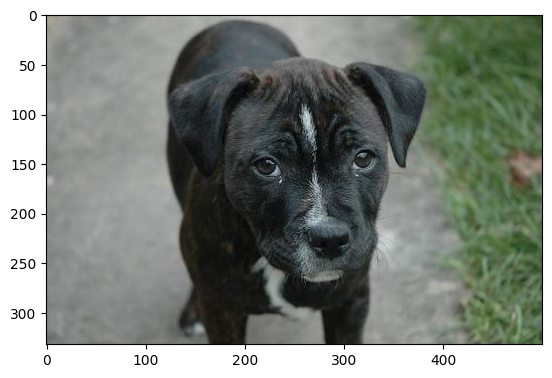

Resolucion de la imagen ==> (332, 500, 3)


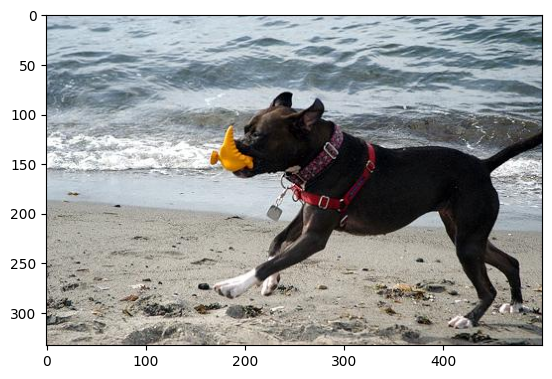

Resolucion de la imagen ==> (333, 500, 3)


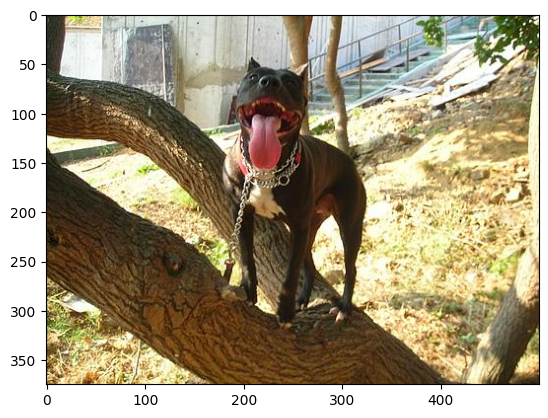

Resolucion de la imagen ==> (375, 500, 3)


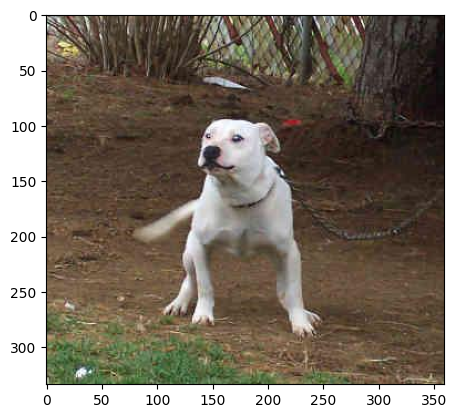

Resolucion de la imagen ==> (334, 360, 3)


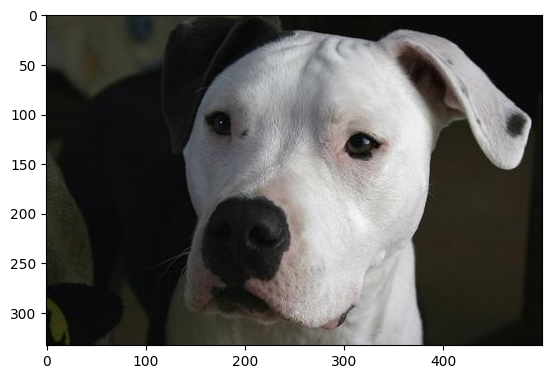

Resolucion de la imagen ==> (333, 500, 3)


In [55]:
# Con esto, ya puedo aplicar el proceso de cambio de resolucion en las imagenes.

# Visualizacion imagenes (antes de aplicar .resize())

indiceCarpeta = 0  # Variable-contador que usare para detener la iteracion de imagenes.

for carpeta in os.listdir():
    
    if indiceCarpeta == 0:
    
        if carpeta == '.ipynb_checkpoints':
            continue

        else:
            contador = 0

            for imagen_file in os.listdir(os.path.join(os.getcwd(), carpeta)):
                if contador < 5:

                    ruta_imagen = os.path.join(os.getcwd(), carpeta, imagen_file)
                    imagen = cv2.imread(ruta_imagen)

                    # Cargo la imagen con gama cromatica RGB
                    imagenRGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
                    contador +=1

                    plt.imshow(imagenRGB)
                    plt.show()
                    print('Resolucion de la imagen ==>', imagen.shape)
                else:
                    indiceCarpeta +=1
                    break
    else:
        break
